Proceso de Exploratory Data Analysis (EDA)

En el contexto de nuestro proyecto de ciencia de datos, dedicamos especial atención a la etapa de Exploratory Data Analysis (EDA), un componente fundamental que nos permite comprender profundamente nuestros datos antes de proceder con el desarrollo de modelos predictivos o de aprendizaje automático. La EDA es un proceso iterativo que nos permite descubrir patrones, tendencias y relaciones ocultas en los datos, lo cual es esencial para el éxito de nuestro sistema de recomendación de películas.

Abordaremos varios pasos clave que nos permiten explorar nuestros datos de manera exhaustiva.

1. Entender nuestro objetivo de Analisis.
2. Revision inicial de los datos.
3. Describir estadisticamente los datos.
4. Visualizar los datos.
5. Detectar Outliers y Anomalias.
6. Explorar relaciones entre nuestras Variables.
7. Edentificar Patrones y Tendencias.
8. Formulamos Hipotesis basadas en nuestros hallazgos.

Al final de esta etapa, hemos adquirido una comprensión profunda de nuestros datos, lo cual nos posiciona favorablemente para el desarrollo de un sistema de recomendación de películas efectivo y preciso. La EDA ha sido un pilar fundamental en nuestro camino hacia el éxito de este proyecto, permitiéndonos identificar oportunidades y desafíos que han guiado el diseño y la implementación de nuestro modelo de recomendación.


Cargamos y Realizamos una Exploracion Inicial de los Datos

In [22]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Importamos las Librerias necesarias para nuestro Proceso EDA.

import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


Estadisticas Descriptivas para Explorar los Datos

In [5]:
# Exploramos los DataSet

print(credits.head())

    id                     character  cast_gender          Actores department  \
0  862            Dr. Martin Kessler          2.0  George C. Scott  Directing   
1  862                  Grandpa Ivan          2.0  George C. Scott  Directing   
2  862      General "Buck" Turgidson          2.0  George C. Scott  Directing   
3  862     Gen. George S. Patton Jr.          2.0  George C. Scott  Directing   
4  862  Lt. William 'Bill' Kinderman          2.0  George C. Scott  Directing   

   crew_gender       job        Diretores  
0          2.0  Director  George C. Scott  
1          2.0  Director  George C. Scott  
2          2.0  Director  George C. Scott  
3          2.0  Director  George C. Scott  
4          2.0  Director  George C. Scott  


In [6]:
print(movies.head())

       budget       id original_language popularity release_date      revenue  \
0  30000000.0    862.0                en  21.946943   1995-10-30  373554033.0   
1  65000000.0   8844.0                en  17.015539   1995-12-15  262797249.0   
2         0.0  15602.0                en    11.7129   1995-12-22          0.0   
3  16000000.0  31357.0                en   3.859495   1995-12-22   81452156.0   
4         0.0  11862.0                en   8.387519   1995-02-10   76578911.0   

                         title  vote_average  vote_count  release_year  \
0                    Toy Story           7.7      5415.0        1995.0   
1                      Jumanji           6.9      2413.0        1995.0   
2             Grumpier Old Men           6.5        92.0        1995.0   
3            Waiting to Exhale           6.1        34.0        1995.0   
4  Father of the Bride Part II           5.7       173.0        1995.0   

      return  
0  12.451801  
1   4.043035  
2   0.000000  
3   5.09

In [7]:
print(genres.head())
print(companies.head())

        id       name   0
0     16.0  Animation NaN
1     35.0     Comedy NaN
2  10751.0     Family NaN
3     12.0  Adventure NaN
4     14.0    Fantasy NaN
                        name       id     0
0    Pixar Animation Studios      3.0  None
1           TriStar Pictures    559.0  None
2               Teitler Film   2550.0  None
3  Interscope Communications  10201.0  None
4               Warner Bros.   6194.0  None


In [8]:
  # Información general de los datasets
print(credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312606 entries, 0 to 312605
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           312606 non-null  int64  
 1   character    303903 non-null  object 
 2   cast_gender  312606 non-null  float64
 3   Actores      312606 non-null  object 
 4   department   312606 non-null  object 
 5   crew_gender  312606 non-null  float64
 6   job          312606 non-null  object 
 7   Diretores    312606 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.1+ MB
None


In [9]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45376 non-null  float64
 1   id                 45376 non-null  float64
 2   original_language  45368 non-null  object 
 3   popularity         45377 non-null  object 
 4   release_date       45376 non-null  object 
 5   revenue            45379 non-null  float64
 6   title              45376 non-null  object 
 7   vote_average       45376 non-null  float64
 8   vote_count         45376 non-null  float64
 9   release_year       45376 non-null  float64
 10  return             45379 non-null  float64
dtypes: float64(7), object(4)
memory usage: 3.8+ MB
None


In [10]:
print(genres.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93432 entries, 0 to 93431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      91048 non-null  float64
 1   name    91048 non-null  object 
 2   0       0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 2.1+ MB
None


In [11]:
print(companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82329 entries, 0 to 82328
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    70530 non-null  object 
 1   id      70530 non-null  float64
 2   0       3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 1.9+ MB
None


Ha simple Viste podemos detectar nuestras variables categoricas y Numericas

* Variables Categóricas: title, original_language, Actores, Directores, Name Genres y Name Companies
* Variables Numéricas: popularity, budget, revenue, release_year, return.


In [34]:
# Usare un Grafico para visualizar la relaciones entre las variables, presupuesto, ingreso y retorno.

# Estadísticas descriptivas
stats = movies[["budget", "revenue"]].describe()
print(stats)


             budget       revenue
count  4.537600e+04  4.537900e+04
mean   4.232604e+06  1.122936e+07
std    1.743986e+07  6.438789e+07
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00
max    3.800000e+08  2.787965e+09


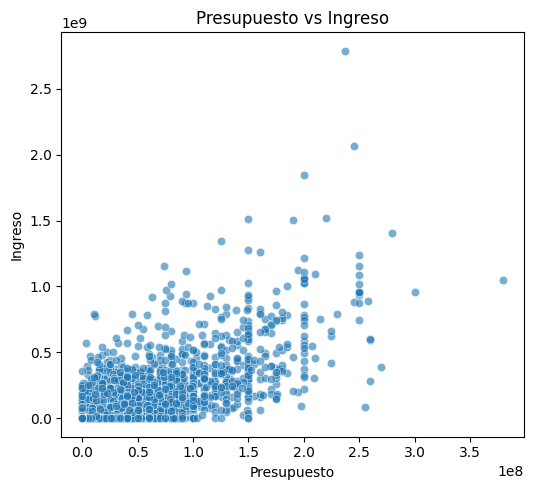

In [35]:
# Realizamos un Grafico de dispersion de las variables
# Configuración del gráfico
plt.figure(figsize=(15, 5))

# Gráfico de Dispersión: Presupuesto vs Ingreso
plt.subplot(1, 3, 1)
sns.scatterplot(data=movies, x="budget", y="revenue", alpha=0.6)
plt.title('Presupuesto vs Ingreso')
plt.xlabel('Presupuesto')
plt.ylabel('Ingreso')

plt.tight_layout()  # Ajustar el diseño
plt.show()

In [36]:
   # Grafica para Deteccion de Outliers en variables Numericas
   # Metodo Boxplot

# Configuración del gráfico
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'Presupuesto')

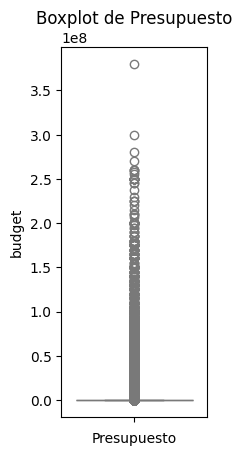

In [37]:
# Boxplot para Presupuesto // Budget
plt.subplot(1, 3, 1)
sns.boxplot(data=movies["budget"], color='lightblue')
plt.title('Boxplot de Presupuesto')
plt.xlabel('Presupuesto')

Text(0.5, 0, 'Ingreso')

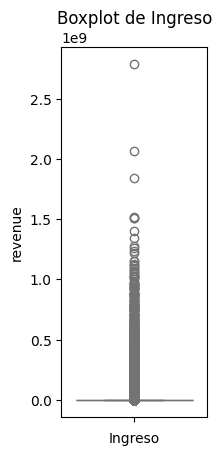

In [38]:
# Boxplot para Ingreso
plt.subplot(1, 3, 2)
sns.boxplot(data=movies["revenue"], color='lightgreen')
plt.title('Boxplot de Ingreso')
plt.xlabel('Ingreso')

In [39]:
# En esta parte identificamos los Outliers

# Función para detectar outliers

def detect_outliers(data):
    Q1 = data.quantile(0.25) # Primer cuartil, que representa el valor por debajo del cual se encuentra el 25% de los datos.
    Q3 = data.quantile(0.75) # Tercer cuartil, que representa el valor por debajo del cual se encuentra el 75% de los datos.
    IQR = Q3 - Q1 # Rango Intercuartilico, diferencia entre el tercer cuartil y el primer cuartil. Representa el rango en el que se encuentra el 50% central de los datos.
    lower_bound = Q1 - 1.5 * IQR # Cualquier valor por debajo de este límite se considera un outlier.
    upper_bound = Q3 + 1.5 * IQR # Cualquier valor por encima de este límite también se considera un outlier.
    return data[(data < lower_bound) | (data > upper_bound)]

# Detectar outliers para cada variable

outliers_presupuesto = detect_outliers(movies["budget"])
outliers_ingreso = detect_outliers(movies["revenue"])


# Mostrar outliers
print("Outliers de Presupuesto:\n", outliers_presupuesto)
print("\nOutliers de Ingreso:\n", outliers_ingreso)

Outliers de Presupuesto:
 0        30000000.0
1        65000000.0
3        16000000.0
5        60000000.0
6        58000000.0
            ...    
45317     2000000.0
45323     2000000.0
45324      800000.0
45326     2000000.0
45336     5000000.0
Name: budget, Length: 8886, dtype: float64

Outliers de Ingreso:
 0        373554033.0
1        262797249.0
3         81452156.0
4         76578911.0
5        187436818.0
            ...     
45314            3.0
45316        50656.0
45324      1328612.0
45326      1268793.0
45336      1413000.0
Name: revenue, Length: 7407, dtype: float64


In [14]:
# Analisis de las palabras mas frecuentes
    # Usamos WordCloud para crear una nube de palabras de el dataset movies

    # Filtrar títulos no nulos
titles = movies['title'].dropna()

    # Crear un texto a partir de los títulos no nulos
text = " ".join(title for title in titles)

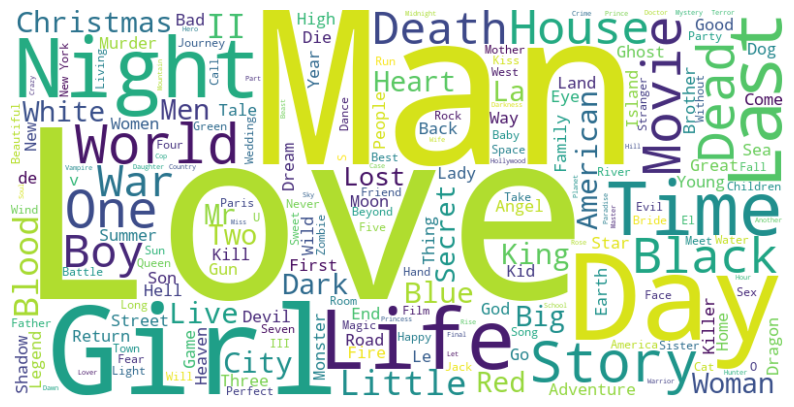

In [15]:
    # Se crea la nube de Palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar los ejes
plt.show()

In [16]:
# Exploramos la Relacion entre Genero y Exito por Pelicula, Calcularemos la Media de Ingresos por Genero.

   # Par crear una tabla Intermedia que relacione ambos Dataframes necesitamos unirlos.

merged_data = pd.merge(movies, genres, left_on='id', right_on='id', how='left')

In [17]:
merged_data.columns

Index(['budget', 'id', 'original_language', 'popularity', 'release_date',
       'revenue', 'title', 'vote_average', 'vote_count', 'release_year',
       'return', 'name', '0'],
      dtype='object')

In [27]:
# Agrupamos por género y calculamos la media de ingresos
revenue_by_genre = merged_data.groupby("name")["revenue"].mean().reset_index()
revenue_by_genre.head()

,name,revenue
0,Action,89460381.0
1,Adventure,940335536.0
2,Animation,40031879.0
3,Carousel Productions,76657000.0
4,Comedy,527068851.0


In [21]:
# Verificar valores nulos
null_counts = revenue_by_genre.isnull().sum()
print(null_counts)

# Verificar valores en cero
zero_counts = (revenue_by_genre["name"] == 0).sum()
print(zero_counts)

zero_counts1 = (revenue_by_genre["revenue"] == 0).sum()
print(zero_counts1)


name       0
revenue    0
dtype: int64
0
7


C:\Users\matencio\AppData\Local\Temp\ipykernel_3436\825403447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=revenue_by_genre, x="name", y="revenue", palette='viridis')


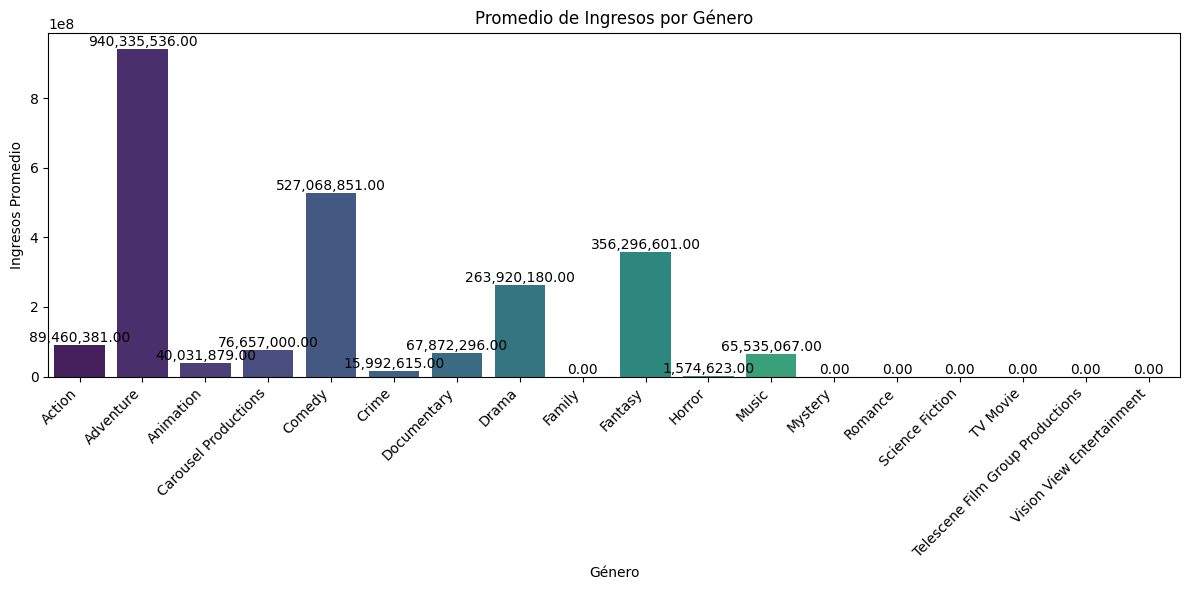

In [30]:
# Ahora visualizamos los Resultados con la Libreria Seaborn

# Configuración del gráfico
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=revenue_by_genre, x="name", y="revenue", palette='viridis')

# Agregar montos de ingresos sobre las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.2f}',  # Formato de número con comas y dos decimales
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordenadas
                      ha='center', va='bottom', fontsize=10, color='black', rotation=0)

# Títulos y etiquetas
plt.title('Promedio de Ingresos por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajustar el diseño
plt.show()


Los resultados encontrados, nos indican que el genero de aventura es el mas Exitoso y el que tiene mayores ingresos. 